# Importing Libraries

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

# Loading Data

In [9]:
data = pd.read_csv("data_for_lr.csv")

In [10]:
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [12]:
data.isnull().sum()

x    0
y    1
dtype: int64

In [13]:
data.isnull()

,x,y
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
695,False,False
696,False,False
697,False,False
698,False,False


# Data Processing

In [15]:
data = data.dropna()
print("Shape of the data: ", data.shape)

Shape of the data:  (699, 2)


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


# Splitting Data

In [53]:
#training input and output
train_input = np.array(data.x[0:500]).reshape(500, 1)
train_output = np.array(data.y[0:500]).reshape(500, 1)

#validation data input and output
test_input = np.array(data.x[500:700]).reshape(199, 1)
test_output = np.array(data.y[500:699]).reshape(199, 1) 

In [54]:
print(f"training input data shape = {train_input.shape}")
print(f"training output data shape = {train_input.shape}")
print(f"testing input data shape = {test_input.shape}")
print(f"testing output data shape = {test_output.shape}")

training input data shape = (500, 1)
training output data shape = (500, 1)
testing input data shape = (199, 1)
testing output data shape = (199, 1)


# <font color = "red">Linear Regression</font>

# Forward Propogation
f(x) = m*x + c

In [55]:
def forward_propagation(train_input, parameters):
    m = parameters["m"]
    c = parameters["c"]
    
    predictions = np.multiply(m, train_input) + c
    
    return predictions

# Cost Function
summation(1/2n * (y-f(x))^2)

In [56]:
def cost_function(predictions, train_output):
    cost = np.mean((train_output - predictions)**2)*0.5
    return cost

# Gradient Descent for Backpropagation

df  = summ(f(x)-y)/n

dm = df*x

dc = df*1

In [57]:
def backward_propagation(train_input, train_output, predictions):
    
    derivatives = dict()
    df = predictions-train_output
    dm = np.mean(np.multiply(df,train_input))
    dc = np.mean(df)
    
    derivatives["dm"] = dm
    derivatives["dc"] = dc
    
    return derivatives

# Update Parameters

m = m-(learning_rate*dm)

c = c-(learning_rate*dc)

In [58]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters["m"] = parameters["m"] - learning_rate*derivatives['dm']
    parameters["c"] = parameters["c"] - learning_rate*derivatives['dc']
    
    return parameters
    

# Model Training 

In [63]:
def train(train_input, train_output, learning_rate, iters):
    
    #random parameters
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1)
    parameters["c"] = np.random.uniform(0,1)
    
    plt.figure()
    
    #loss
    loss = list()
    
    #iteration
    for i in range(iters):
        #forward propagation
        predictions = forward_propagation(train_input, parameters)
        
        #cost
        cost = cost_function(predictions, train_output)
        
        loss.append(cost)
        print(f"Iteration = {i+1}, Loss = {cost}")
        
        #plot
        fig, ax = plt.subplots()
        
        ax.plot(train_input, train_output, "+", label = "Original")
        ax.plot(train_input, predictions, "*", label = "Training")
        
        legend = ax.legend()
        
        plt.plot(train_input, train_output, "+", label = "Original")
        plt.plot(train_input, predictions, "*", label = "Training")
        plt.show()
        
        #back_propagation
        derivatives = backward_propagation(train_input, train_output, predictions)
        
        #update the parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)
        
            
    return parameters, loss

# Training

Iteration = 1, Loss = 4.005871066313326


<Figure size 640x480 with 0 Axes>

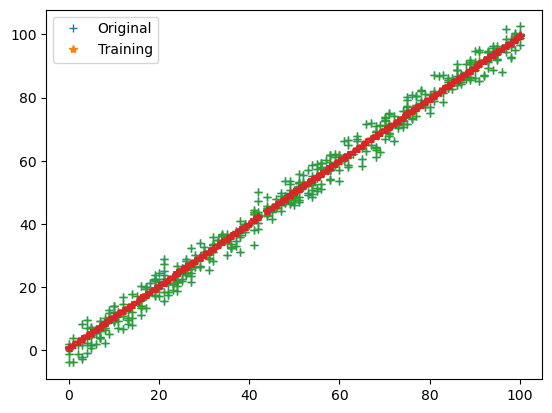

Iteration = 2, Loss = 4.00551847478076


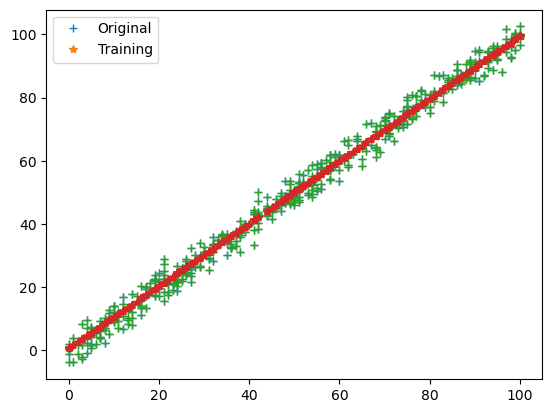

Iteration = 3, Loss = 4.0053558930232995


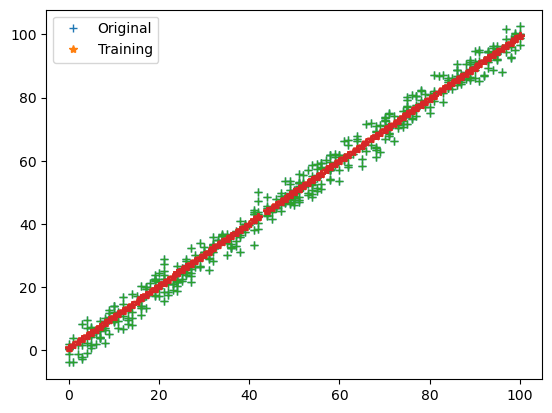

Iteration = 4, Loss = 4.00527951904277


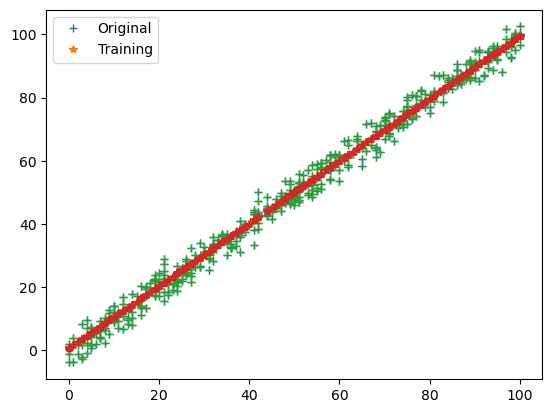

Iteration = 5, Loss = 4.0052422577576205


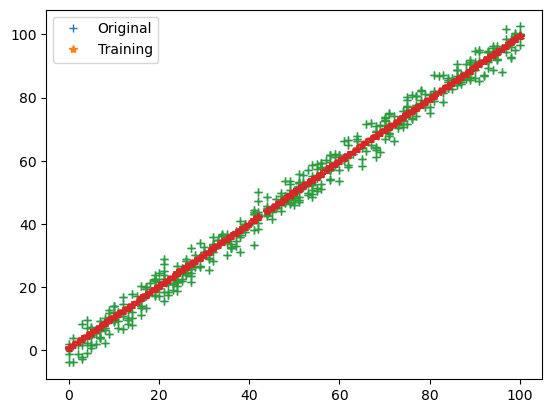

Iteration = 6, Loss = 4.005222742077178


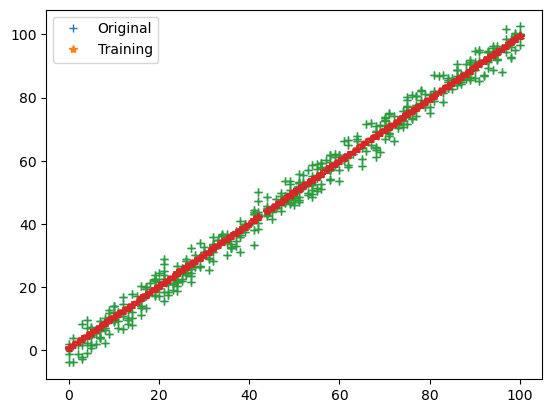

Iteration = 7, Loss = 4.00521127772873


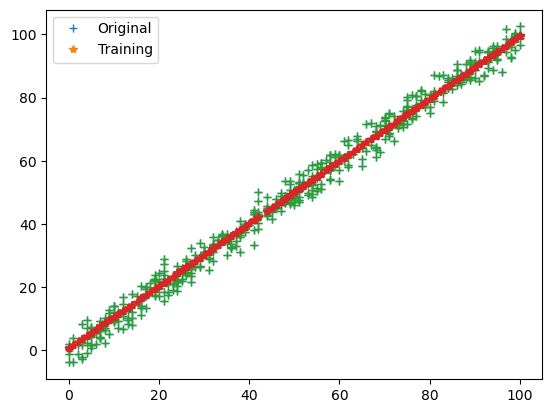

Iteration = 8, Loss = 4.005203466410004


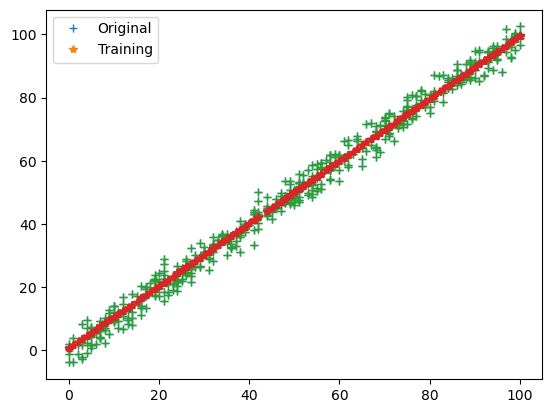

Iteration = 9, Loss = 4.005197312606382


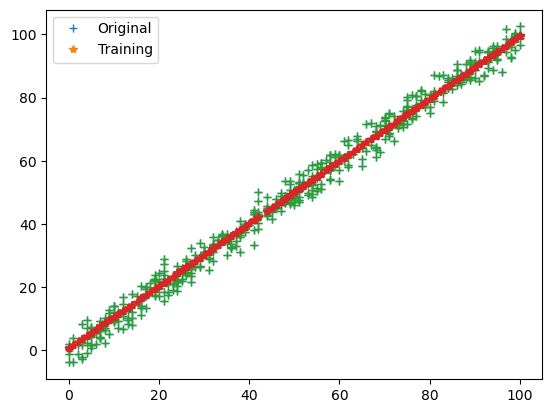

Iteration = 10, Loss = 4.00519191095066


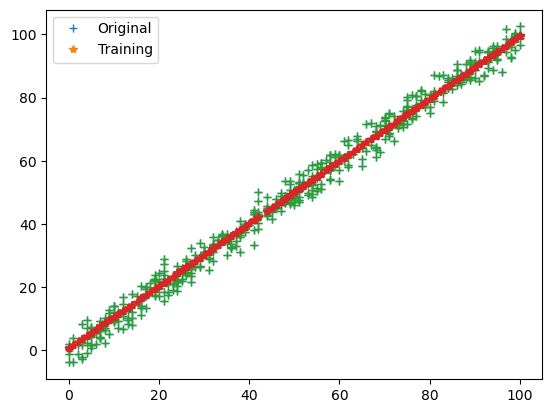

Iteration = 11, Loss = 4.00518685067673


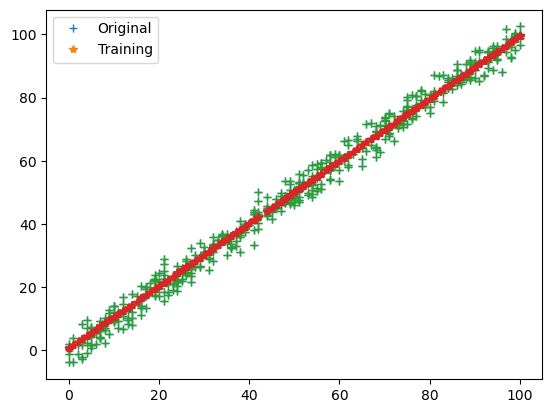

Iteration = 12, Loss = 4.005181945419552


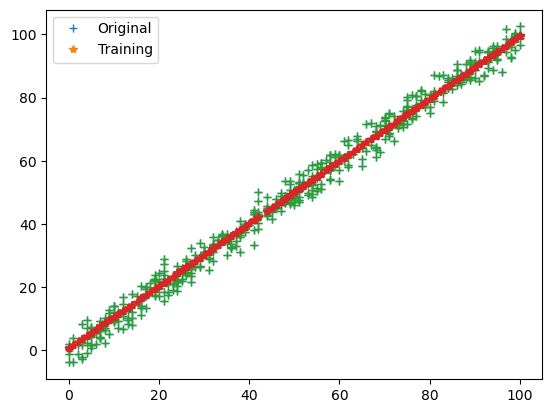

Iteration = 13, Loss = 4.005177110625088


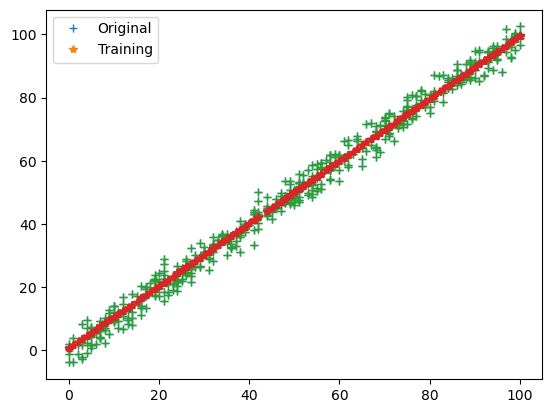

Iteration = 14, Loss = 4.005172307931074


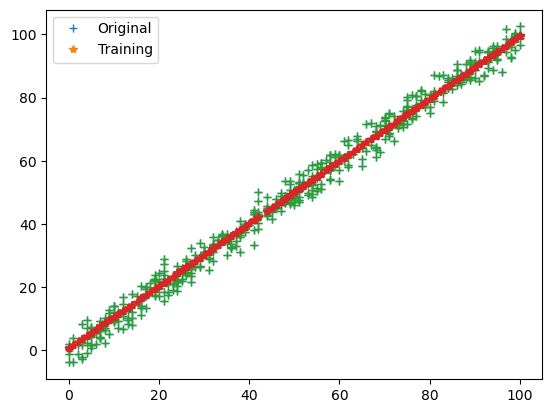

Iteration = 15, Loss = 4.005167519932501


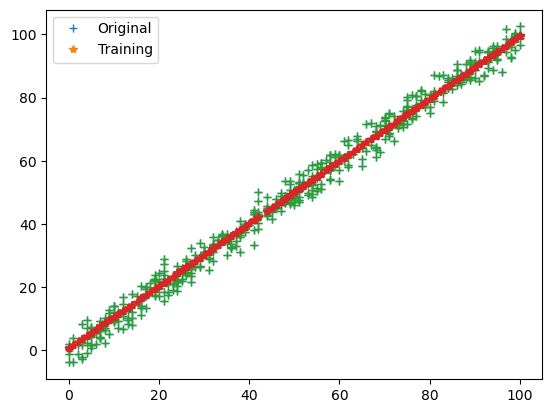

Iteration = 16, Loss = 4.00516273873269


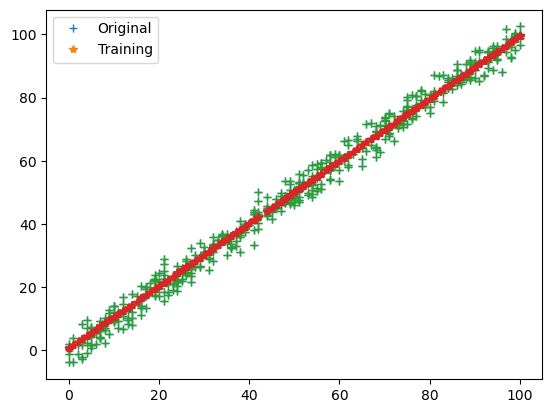

Iteration = 17, Loss = 4.005157960748902


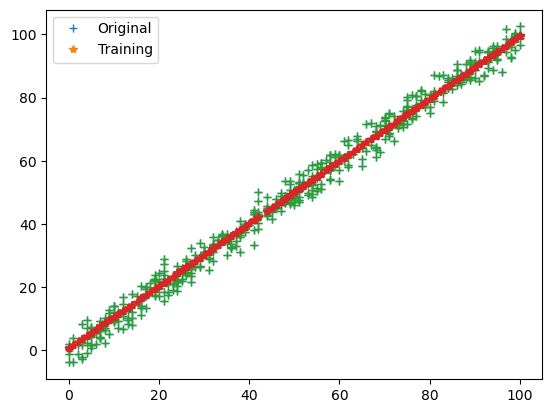

Iteration = 18, Loss = 4.00515318435564


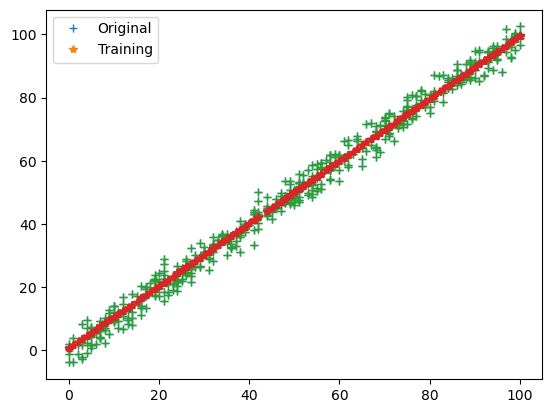

Iteration = 19, Loss = 4.005148408815406


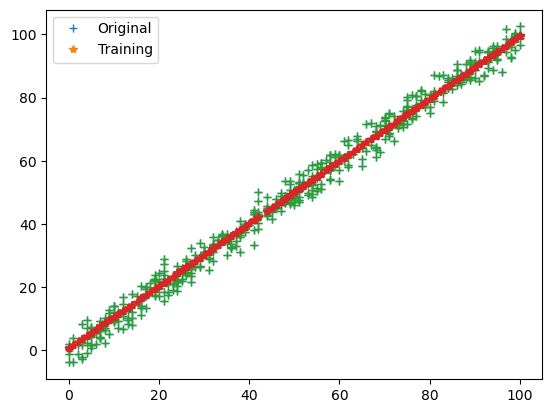

Iteration = 20, Loss = 4.005143633793589


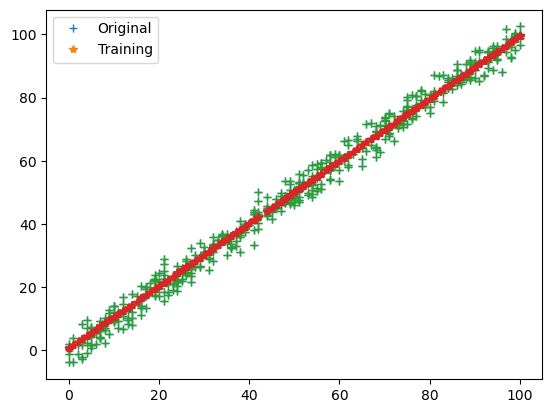

In [64]:
parameters, loss = train(train_input, train_output, 0.0001, 20)

In [67]:
print(parameters)

{'m': 0.9878651390458545, 'c': 0.6313910130335969}


In [68]:
loss

[4.005871066313326,
 4.00551847478076,
 4.0053558930232995,
 4.00527951904277,
 4.0052422577576205,
 4.005222742077178,
 4.00521127772873,
 4.005203466410004,
 4.005197312606382,
 4.00519191095066,
 4.00518685067673,
 4.005181945419552,
 4.005177110625088,
 4.005172307931074,
 4.005167519932501,
 4.00516273873269,
 4.005157960748902,
 4.00515318435564,
 4.005148408815406,
 4.005143633793589]

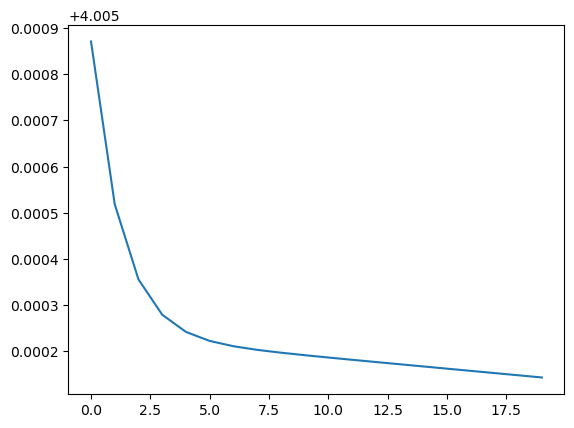

In [69]:
plt.plot(loss)

# Let's Predict

In [70]:
test_predictions = test_input * parameters['m']+parameters['c']

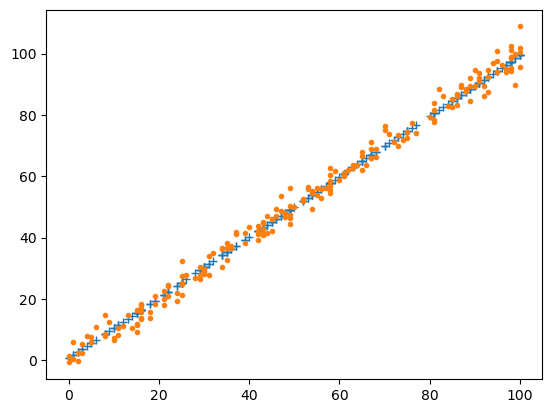

In [71]:
plt.plot(test_input, test_predictions, "+")
plt.plot(test_input, test_output, ".")
plt.show()

# Cost Of Prediction

In [72]:
cost_function(test_output, test_predictions)

4.012572011185655

# <font color = "green"> Linear Regression Using sklearn </font> 

# Training Model 

In [74]:
from sklearn.linear_model import LinearRegression

In [76]:
lr_model = LinearRegression()

In [77]:
lr_model.fit(train_input,train_output)

LinearRegression()

In [78]:
lr_model.coef_

array([[1.0009993]])

In [79]:
lr_model.intercept_

array([-0.23603461])

# Prediction

In [80]:
test_predictions = lr_model.predict(test_input)

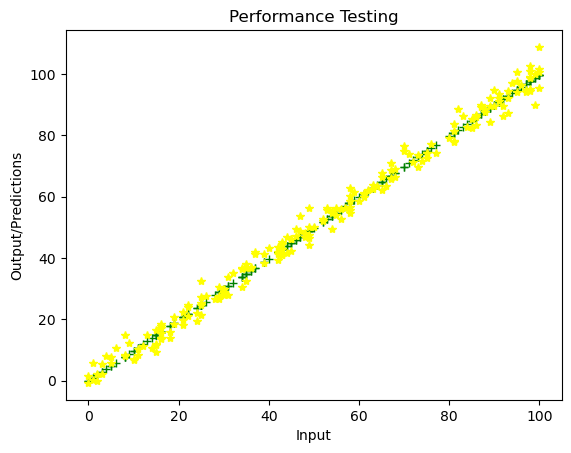

In [81]:
plt.plot(test_input, test_predictions,"+",color="green")
plt.plot(test_input, test_output,"*",color="yellow")
plt.title("Performance Testing")
plt.xlabel("Input")
plt.ylabel("Output/Predictions")
plt.show()

# cost

In [84]:
from sklearn.metrics import mean_squared_error

cost = mean_squared_error(test_output, test_predictions)
cost

8.030031591835371